In [1]:
import time
import mlrose_hiive as mlrh
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [7, 7]

random_state = 2020
np.random.seed(1)

In [2]:
def plot_fitness_iteration(curve, title, x="Iteration", y="Fitness"):
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    length = len(curve)
    plt.plot(range(length), curve, label=y, lw=2)
    plt.legend(loc="best")
    plt.show()

# Queens Problem

In [3]:
# Problem definition
length = 35
global eval_count
eval_count = 0
# Define alternative N-Queens fitness function for maximization problem
def queens_max(state):
    global eval_count
    eval_count += 1
    # Initialize counter
    fitness_cnt = 0

    # For all pairs of queens
    for i in range(len(state) - 1):
        for j in range(i + 1, len(state)):
            # Check for horizontal, diagonal-up and diagonal-down attacks
            if (state[j] != state[i]) \
                and (state[j] != state[i] + (j - i)) \
                and (state[j] != state[i] - (j - i)):

                # If no attacks, then increment counter
                fitness_cnt += 1

    return fitness_cnt

# Initialize custom fitness function object
q_fitness = mlrh.CustomFitness(queens_max)
# q_fitness = mlrose.Queens()
prob = mlrh.QueensOpt(length=length,
                      fitness_fn=q_fitness,
                      maximize=True)
experiment_name = "queen_prob"
output_directory = "queen"

## MIMIC

In [16]:
mim = mlrh.MIMICRunner(problem=prob,
                       experiment_name=experiment_name,
                       output_directory=output_directory,
                       seed=random_state,
                       population_sizes=[50, 100, 200, 500, 1000, 2000],
                       keep_percent_list=[0.1, 0.25, 0.5, 0.7, 0.8],
                       iteration_list=[50],
                       use_fast_mimic=True)
mim_stats, mim_curve = mim.run()

Running mimic
*****************
*** Run START ***
*****************
use_fast_mimic:[True], pop_size:[50], keep_pct:[0.1], max_iters:[50]
runner_name:[mimic], experiment_name:[queen_prob], attempt:[0], iteration:[0], done:[False], time:[0.08], fitness:[555.0000]
	[32  8  3  3 27  3  7 29 32 24 10  9 11  3  5 28 20  8 20  1  1 15  5 10//  9 21 29 26  6 22 21  4  6 34  3]...

use_fast_mimic:[True], pop_size:[50], keep_pct:[0.1], max_iters:[50]
runner_name:[mimic], experiment_name:[queen_prob], attempt:[50], iteration:[50], done:[True], time:[17.96], fitness:[566.0000]
	[32. 29. 26. 10.  5.  9. 31.  2.  3. 23.  2. 20. 10.  6. 34.  9. 31.  1.// 22. 27.  9. 26. 15. 11. 14. 21. 28. 16. 19. 27.  0. 22. 34. 15.  2.]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[True], pop_size:[50], keep_pct:[0.25], max_iters:[50]
runner_name:[mimic], experiment_name:[queen_prob], attempt:[0], iteration:[0], done:[False], time:[0.06], f

use_fast_mimic:[True], pop_size:[200], keep_pct:[0.25], max_iters:[50]
runner_name:[mimic], experiment_name:[queen_prob], attempt:[0], iteration:[0], done:[False], time:[0.29], fitness:[555.0000]
	[32  8  3  3 27  3  7 29 32 24 10  9 11  3  5 28 20  8 20  1  1 15  5 10//  9 21 29 26  6 22 21  4  6 34  3]...

use_fast_mimic:[True], pop_size:[200], keep_pct:[0.25], max_iters:[50]
runner_name:[mimic], experiment_name:[queen_prob], attempt:[43], iteration:[50], done:[True], time:[40.12], fitness:[580.0000]
	[28.  2. 10. 28. 16. 24. 13. 29. 12. 26.  8.  4. 22. 34. 18. 33.  9. 32.//  8.  4. 34. 32. 19. 23. 21.  0. 31. 13. 14. 17. 29.  7. 19. 27.  3.]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[True], pop_size:[200], keep_pct:[0.5], max_iters:[50]
runner_name:[mimic], experiment_name:[queen_prob], attempt:[0], iteration:[0], done:[False], time:[0.28], fitness:[555.0000]
	[32  8  3  3 27  3  7 29 32 24 10  9 11  3  5

use_fast_mimic:[True], pop_size:[1000], keep_pct:[0.5], max_iters:[50]
runner_name:[mimic], experiment_name:[queen_prob], attempt:[0], iteration:[0], done:[False], time:[1.35], fitness:[555.0000]
	[32  8  3  3 27  3  7 29 32 24 10  9 11  3  5 28 20  8 20  1  1 15  5 10//  9 21 29 26  6 22 21  4  6 34  3]...

use_fast_mimic:[True], pop_size:[1000], keep_pct:[0.5], max_iters:[50]
runner_name:[mimic], experiment_name:[queen_prob], attempt:[24], iteration:[50], done:[True], time:[148.29], fitness:[585.0000]
	[31.  9.  5. 12. 24. 22.  2. 29. 26. 11. 25. 10.  6.  3. 33.  9.  0. 18.//  1. 32. 30. 28. 34.  4. 19.  1. 14. 27. 13. 33.  2. 17. 14. 24. 21.]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[True], pop_size:[1000], keep_pct:[0.7], max_iters:[50]
runner_name:[mimic], experiment_name:[queen_prob], attempt:[0], iteration:[0], done:[False], time:[1.37], fitness:[555.0000]
	[32  8  3  3 27  3  7 29 32 24 10  9 11  3 

In [17]:
show=10
columns = ['Time', 'Fitness', 'Population Size', 'Keep Percent']
pd.set_option('display.max_rows',show)
df=pd.read_csv("./queen/queen_prob/mimic__queen_prob__run_stats_df.csv")
df[columns].sort_values(by=['Fitness'], ascending=False).head(show)

,Time,Fitness,Population Size,Keep Percent
51,292.834724,587.0,2000,0.10
53,275.321363,587.0,2000,0.25
43,154.208697,586.0,1000,0.25
41,161.129296,585.0,1000,0.10
33,76.400956,585.0,500,0.25
55,269.790202,585.0,2000,0.50
45,148.292036,585.0,1000,0.50
49,161.427105,583.0,1000,0.80
57,288.054391,583.0,2000,0.70
35,82.957977,582.0,500,0.50


MIMIC - Total Function Evaluations: 23027


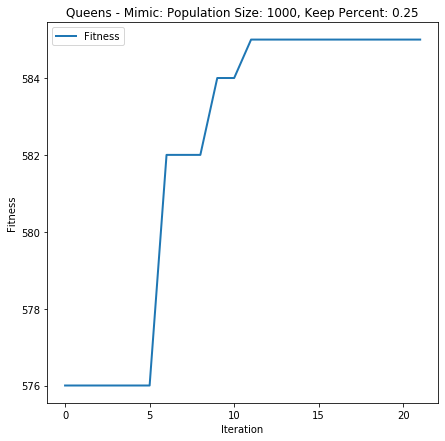

In [4]:
max_attempts = 10
max_iters = 25
keep_pct=0.25
pop_size = 1000
global eval_count
eval_count = 0
best_state, best_fitness, mimic_curve = mlrh.mimic(prob,
                                             max_attempts=max_attempts,
                                             max_iters=max_iters,
                                             random_state=random_state,
                                             pop_size=pop_size,
                                             keep_pct=keep_pct,
                                             curve=True)
print("MIMIC - Total Function Evaluations:", eval_count)
plot_fitness_iteration(mimic_curve,
                       "Queens - Mimic: Population Size: {}, Keep Percent: {}".format(pop_size, keep_pct))

## Genetic Algorithm

In [4]:
ga = mlrh.GARunner(problem=prob,
                   experiment_name=experiment_name,
                   output_directory=output_directory,
                   seed=random_state,
                   max_attempts=20,
                   iteration_list=[100],
                   population_sizes=[100, 500, 1000],
                   mutation_rates=[0.1, 0.25, 0.5, 0.75, 0.9])
ga_stats, ga_curve = ga.run()

Running ga
*****************
*** Run START ***
*****************
pop_size:[100], mutation_prob:[0.1], max_iters:[100]
runner_name:[ga], experiment_name:[queen_prob], attempt:[0], iteration:[0], done:[False], time:[0.18], fitness:[555.0000]
	[32  8  3  3 27  3  7 29 32 24 10  9 11  3  5 28 20  8 20  1  1 15  5 10//  9 21 29 26  6 22 21  4  6 34  3]...

pop_size:[100], mutation_prob:[0.1], max_iters:[100]
runner_name:[ga], experiment_name:[queen_prob], attempt:[21], iteration:[42], done:[True], time:[5.55], fitness:[577.0000]
	[ 0 21 28 24  1 32 13 21  7  3 34 14 30  7 27 23  7 19 33  6 25 10  2  5//  5  4 22  8 29  9  3 24 12  1 26]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
pop_size:[100], mutation_prob:[0.25], max_iters:[100]
runner_name:[ga], experiment_name:[queen_prob], attempt:[0], iteration:[0], done:[False], time:[0.15], fitness:[555.0000]
	[32  8  3  3 27  3  7 29 32 24 10  9 11  3  5 28 20  8 20  1  1 15  5 10//  9

pop_size:[1000], mutation_prob:[0.5], max_iters:[100]
runner_name:[ga], experiment_name:[queen_prob], attempt:[0], iteration:[0], done:[False], time:[0.82], fitness:[555.0000]
	[32  8  3  3 27  3  7 29 32 24 10  9 11  3  5 28 20  8 20  1  1 15  5 10//  9 21 29 26  6 22 21  4  6 34  3]...

pop_size:[1000], mutation_prob:[0.5], max_iters:[100]
runner_name:[ga], experiment_name:[queen_prob], attempt:[21], iteration:[45], done:[True], time:[39.00], fitness:[578.0000]
	[ 7 22 29 11  4 28 18 20 34 21  0 20  8 30 32 33  0  8 33  6 34  1 15 33// 23  3 26  2 25  3 15 14  9 25  6]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
pop_size:[1000], mutation_prob:[0.75], max_iters:[100]
runner_name:[ga], experiment_name:[queen_prob], attempt:[0], iteration:[0], done:[False], time:[0.78], fitness:[555.0000]
	[32  8  3  3 27  3  7 29 32 24 10  9 11  3  5 28 20  8 20  1  1 15  5 10//  9 21 29 26  6 22 21  4  6 34  3]...

pop_size:[1000], mutation

In [7]:
show=10
columns = ['Time', 'Fitness', 'Population Size', 'Mutation Rate']
pd.set_option('display.max_rows',show)
df=pd.read_csv("./queen/queen_prob/ga__queen_prob__run_stats_df.csv")
df[columns].sort_values(by=['Fitness'], ascending=False).head(show)

,Time,Fitness,Population Size,Mutation Rate
5,10.903841,590.0,100,0.50
7,10.127351,590.0,100,0.75
3,11.330267,589.0,100,0.25
9,10.613477,588.0,100,0.90
17,23.609953,580.0,500,0.75
27,43.263337,579.0,1000,0.75
19,23.147037,579.0,500,0.90
11,34.191525,579.0,500,0.10
25,38.999550,578.0,1000,0.50
23,22.315213,578.0,1000,0.25


Genetic Alg - Total Function Evaluations: 10429


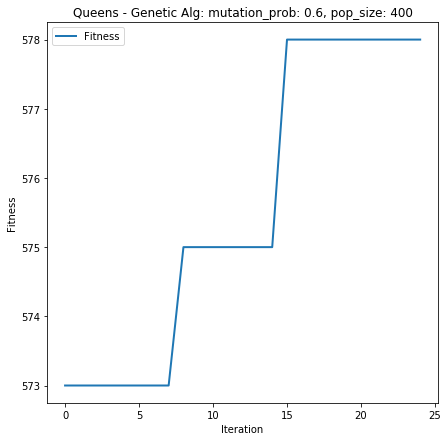

In [5]:
max_attempts = 20
max_iters = 25
mutation_prob=0.6
pop_size = 400
global eval_count
eval_count = 0
best_state, best_fitness, gen_curve = mlrh.genetic_alg(prob,
                                                   max_attempts=max_attempts,
                                                   max_iters=max_iters,
                                                   random_state=random_state,
                                                   pop_size=pop_size,
                                                   mutation_prob=mutation_prob,
                                                   curve=True)
print("Genetic Alg - Total Function Evaluations:", eval_count)
plot_fitness_iteration(gen_curve,
                       "Queens - Genetic Alg: mutation_prob: {}, pop_size: {}".format(mutation_prob, pop_size))

## Simulated Annealing

In [10]:
sa = mlrh.SARunner(problem=prob,
                   experiment_name=experiment_name,
                   output_directory=output_directory,
                   seed=random_state,
                   max_attempts=200,
                   iteration_list=[2500],
                   temperature_list=[0.05, 0.1, 0.5, 1, 10, 20, 25],
                   decay_list=[mlrh.GeomDecay, mlrh.ExpDecay, mlrh.ArithDecay])
sa_stats, sa_curve = sa.run()

Running sa
*****************
*** Run START ***
*****************
schedule:[0.05], max_iters:[2500]
runner_name:[sa], experiment_name:[queen_prob], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[555.0000]
	[32  8  3  3 27  3  7 29 32 24 10  9 11  3  5 28 20  8 20  1  1 15  5 10//  9 21 29 26  6 22 21  4  6 34  3]...

schedule:[0.05], max_iters:[2500]
runner_name:[sa], experiment_name:[queen_prob], attempt:[201], iteration:[1698], done:[True], time:[2.86], fitness:[594.0000]
	[22 12 17 11  7 19 31 28 24  3 16 10 29  2  4 33 20  8  5  1 32 18 27  6// 26 34 27 13 23  9 15  0 25 21 30]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
schedule:[0.05], max_iters:[2500]
runner_name:[sa], experiment_name:[queen_prob], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[555.0000]
	[32  8  3  3 27  3  7 29 32 24 10  9 11  3  5 28 20  8 20  1  1 15  5 10//  9 21 29 26  6 22 21  4  6 34  3]...

schedule:[0.05], ma

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
schedule:[10], max_iters:[2500]
runner_name:[sa], experiment_name:[queen_prob], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[555.0000]
	[32  8  3  3 27  3  7 29 32 24 10  9 11  3  5 28 20  8 20  1  1 15  5 10//  9 21 29 26  6 22 21  4  6 34  3]...

schedule:[10], max_iters:[2500]
runner_name:[sa], experiment_name:[queen_prob], attempt:[201], iteration:[2183], done:[True], time:[4.02], fitness:[593.0000]
	[ 8 10  1  9 19  2 11 30 12 22 17 14 23 29 24 33  5  7  4  0 34 13  4  6// 15 27 21 28 16  1 26 31 25  3 32]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
schedule:[10], max_iters:[2500]
runner_name:[sa], experiment_name:[queen_prob], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[555.0000]
	[32  8  3  3 27  3  7 29 32 24 10  9 11  3  5 28 20  8 20  1  1 15  5 10//  9 21 29 26  6 22 21  4  6

In [8]:
show=10
columns = ['Time', 'Fitness', 'Temperature', 'schedule_type']
pd.set_option('display.max_rows',show)
df=pd.read_csv("./queen/queen_prob/sa__queen_prob__run_stats_df.csv")
df[columns].sort_values(by=['Fitness'], ascending=False).head(show)

,Time,Fitness,Temperature,schedule_type
9,3.022774,594.0,0.10,exponential
7,3.025773,594.0,0.10,geometric
13,4.066191,594.0,0.50,geometric
11,2.949320,594.0,0.10,arithmetic
31,4.092280,594.0,20.00,geometric
1,2.856756,594.0,0.05,geometric
5,2.730146,594.0,0.05,arithmetic
3,2.779787,594.0,0.05,exponential
33,4.989198,593.0,20.00,exponential
27,4.023431,593.0,10.00,exponential


Simulated Annealing - Total Function Evaluations: 1816


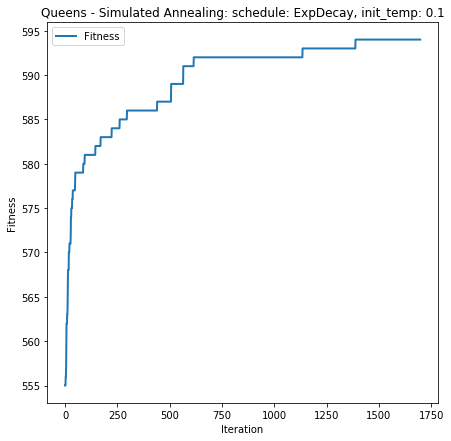

In [6]:
max_attempts = 200
max_iters = 2500
init_temp = 0.1
schedule = mlrh.ExpDecay(init_temp)
global eval_count
eval_count = 0
best_state, best_fitness, sa_curve = mlrh.simulated_annealing(prob,
                                                             max_attempts=max_attempts,
                                                             max_iters=max_iters,
                                                             random_state=random_state,
                                                             schedule=schedule,
                                                             curve=True)
print("Simulated Annealing - Total Function Evaluations:", eval_count)
plot_fitness_iteration(sa_curve,
                       "Queens - Simulated Annealing: schedule: {}, init_temp: {}".format(schedule.__class__.__name__, init_temp))

# Randomized Hill Climbing

In [13]:
rhc = mlrh.RHCRunner(problem=prob,
                    experiment_name=experiment_name,
                    output_directory=output_directory,
                    seed=random_state,
                    max_attempts=200,
                    iteration_list=[2500],
                    restart_list=[10])
rhc_stats, rhc_curve = rhc.run()

Running rhc
*****************
*** Run START ***
*****************
restarts:[10], max_iters:[2500], current_restart:[0]
runner_name:[rhc], experiment_name:[queen_prob], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[555.0000]
	[32  8  3  3 27  3  7 29 32 24 10  9 11  3  5 28 20  8 20  1  1 15  5 10//  9 21 29 26  6 22 21  4  6 34  3]...

restarts:[10], max_iters:[2500], current_restart:[0]
runner_name:[rhc], experiment_name:[queen_prob], attempt:[201], iteration:[921], done:[True], time:[1.33], fitness:[592.0000]
	[32 23  2 14 27 25 31 11 32 19 12  9 33  3 30 28 13  8 24  0  1 15  5 10// 33 21 29 26  6 22 18  4  7 34 16]...

restarts:[10], max_iters:[2500], current_restart:[1]
runner_name:[rhc], experiment_name:[queen_prob], attempt:[0], iteration:[0], done:[False], time:[1.36], fitness:[544.0000]
	[ 9  9 12 16 27 34 31 34  7 27 27 26 17 24  4 15 33 34 18 22 24 10  8  7// 33  4 24 27  4 24 15 34 12 15 26]...

restarts:[10], max_iters:[2500], current_restart:[1]
runner_n

In [9]:
show=10
columns = ['Time', 'Fitness', 'Restarts', 'current_restart']
pd.set_option('display.max_rows',show)
df=pd.read_csv("./queen/queen_prob/rhc__queen_prob__run_stats_df.csv")
df[columns].sort_values(by=['Fitness'], ascending=False).head(show)

,Time,Fitness,Restarts,current_restart
1,1.332992,592.0,10,0
19,14.044269,590.0,10,9
7,4.678264,589.0,10,3
17,11.692395,589.0,10,8
13,7.891547,589.0,10,6
9,5.544039,588.0,10,4
11,6.671673,587.0,10,5
21,15.137302,587.0,10,10
3,2.470676,587.0,10,1
5,3.431813,586.0,10,2


Randomized Hill Climbing - Total Function Evaluations: 14401


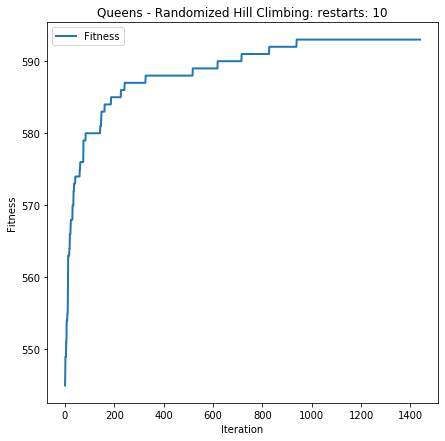

In [7]:
max_attempts = 500
max_iters = 2500
restarts = 10
global eval_count
eval_count = 0
best_state, best_fitness, rhc_curve = mlrh.random_hill_climb(prob,
                                                         max_attempts=max_attempts,
                                                         max_iters=max_iters,
                                                         random_state=random_state,
                                                         restarts=restarts,
                                                         curve=True)
print("Randomized Hill Climbing - Total Function Evaluations:", eval_count)
plot_fitness_iteration(rhc_curve,
                       "Queens - Randomized Hill Climbing: restarts: {}".format(restarts))

## Fitness vs Iterations

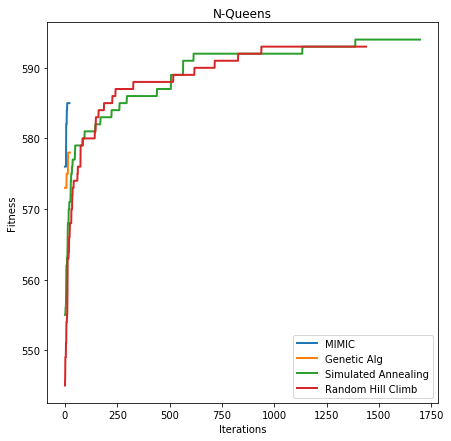

In [10]:
all_curves = {"MIMIC": mimic_curve, "Genetic Alg": gen_curve, "Simulated Annealing": sa_curve, "Random Hill Climb": rhc_curve}

np.array([len(x) for x in all_curves]).max()

plt.xlabel("Iterations")
plt.ylabel("Fitness")
plt.title("N-Queens")

for name, curve in all_curves.items():
    plt.plot(range(len(curve)), curve, label=name, lw=2)

    plt.legend(loc="best")
plt.show()

## Function Evaluations vs Input Size

In [11]:
def prob_gen(input = 35):
    length = input
    global eval_count
    eval_count = 0
    # Define alternative N-Queens fitness function for maximization problem
    def queens_max(state):
        global eval_count
        eval_count += 1
        # Initialize counter
        fitness_cnt = 0

        # For all pairs of queens
        for i in range(len(state) - 1):
            for j in range(i + 1, len(state)):
                # Check for horizontal, diagonal-up and diagonal-down attacks
                if (state[j] != state[i]) \
                    and (state[j] != state[i] + (j - i)) \
                    and (state[j] != state[i] - (j - i)):

                    # If no attacks, then increment counter
                    fitness_cnt += 1

        return fitness_cnt

    # Initialize custom fitness function object
    q_fitness = mlrh.CustomFitness(queens_max)
    # q_fitness = mlrose.Queens()
    prob = mlrh.QueensOpt(length=length,
                      fitness_fn=q_fitness,
                      maximize=True)
    return prob

In [12]:
def eval_count_mimic(prob):
    s = time.time()
    max_attempts = 10
    max_iters = 25
    keep_pct=0.25
    pop_size = 1000
    global eval_count
    eval_count = 0
    best_state, best_fitness, mimic_curve = mlrh.mimic(prob,
                                             max_attempts=max_attempts,
                                             max_iters=max_iters,
                                             random_state=random_state,
                                             pop_size=pop_size,
                                             keep_pct=keep_pct,
                                             curve=True)
    e = time.time()
    t_diff = e-s
    result = (eval_count, len(rhc_curve), t_diff)
    return result

In [13]:
def eval_count_gen(prob):
    s = time.time()
    max_attempts = 20
    max_iters = 25
    mutation_prob=0.6
    pop_size = 400
    global eval_count
    eval_count = 0
    best_state, best_fitness, gen_curve = mlrh.genetic_alg(prob,
                                                   max_attempts=max_attempts,
                                                   max_iters=max_iters,
                                                   random_state=random_state,
                                                   pop_size=pop_size,
                                                   mutation_prob=mutation_prob,
                                                   curve=True)
    e = time.time()
    t_diff = e-s
    result = (eval_count, len(rhc_curve), t_diff)
    return result

In [14]:
def eval_count_sa(prob):
    s = time.time()
    max_attempts = 200
    max_iters = 2500
    init_temp = 0.1
    schedule = mlrh.ExpDecay(init_temp)
    global eval_count
    eval_count = 0
    best_state, best_fitness, sa_curve = mlrh.simulated_annealing(prob,
                                                             max_attempts=max_attempts,
                                                             max_iters=max_iters,
                                                             random_state=random_state,
                                                             schedule=schedule,
                                                             curve=True)
    e = time.time()
    t_diff = e-s
    result = (eval_count, len(rhc_curve), t_diff)
    return result

In [15]:
def eval_count_rhc(prob):
    s = time.time()
    max_attempts = 500
    max_iters = 2500
    restarts = 10
    global eval_count
    eval_count = 0
    best_state, best_fitness, rhc_curve = mlrh.random_hill_climb(prob,
                                                         max_attempts=max_attempts,
                                                         max_iters=max_iters,
                                                         random_state=random_state,
                                                         restarts=restarts,
                                                         curve=True)
    e = time.time()
    t_diff = e-s
    result = (eval_count, len(rhc_curve), t_diff)
    return result

In [16]:
np.random.seed(1)
inputs = [10, 20, 30, 40, 50, 60, 70, 80]

mimic_curve_eval = [eval_count_mimic(prob_gen(x)) for x in inputs]
gen_curve_eval = [eval_count_gen(prob_gen(x)) for x in inputs]
sa_curve_eval = [eval_count_sa(prob_gen(x)) for x in inputs]
rhc_curve_eval = [eval_count_rhc(prob_gen(x)) for x in inputs]

all_curves = {"MIMIC": mimic_curve_eval,
              "Genetic Alg": gen_curve_eval,
              "Simulated Annealing": sa_curve_eval,
              "Random Hill Climb": rhc_curve_eval}


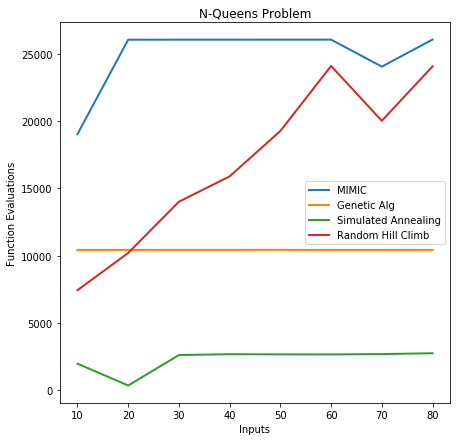

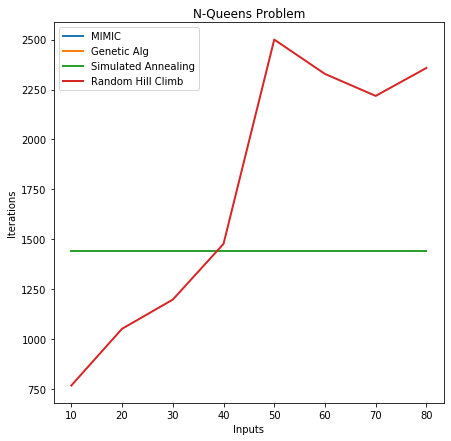

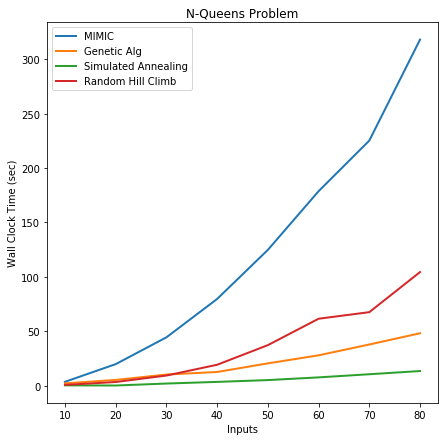

In [17]:
l = [("Inputs", "Function Evaluations"),
     ("Inputs", "Iterations"),
     ("Inputs", "Wall Clock Time (sec)")]

for i in range(3):
    plt.xlabel(l[i][0])
    plt.ylabel(l[i][1])
    plt.title("N-Queens Problem")

    for name, curve in all_curves.items():
        plt.plot(inputs, [x[i] for x in curve], label=name, lw=2)

        plt.legend(loc="best")
    plt.show()

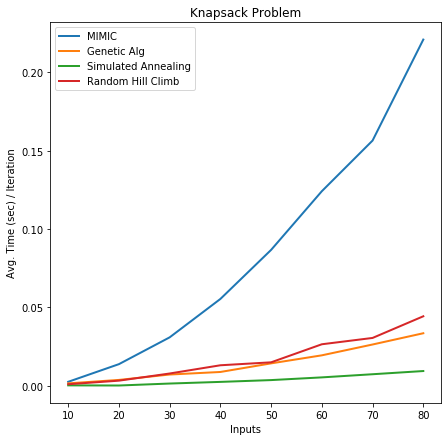

In [18]:
plt.xlabel("Inputs")
plt.ylabel("Avg. Time (sec) / Iteration")
plt.title("Knapsack Problem")

for name, curve in all_curves.items():
    avg_time_div_iterations = np.array([x[2] for x in curve]) / np.array([x[1] for x in curve])
    plt.plot(inputs, avg_time_div_iterations, label=name, lw=2)

    plt.legend(loc="best")
plt.show()